# Predicting Student's Math Abilities Using a Multiple Regression Framework

### Problem Statement:
The latest PISA data from 2019 shows that Australia's performance in Mathematics is continuously declining and has dropped by 33 points between 2003 and 2019 (https://amsi.org.au/2019/12/04/time-to-get-real-on-maths-as-pisa-reveals-decline/). Combined with Australia's IT skills shortage (https://www.commbank.com.au/articles/business/foresight/boosting-australias-tech-talent.html), it is now crucial to act on these issues and to improve student's mathematical literacy.

### The Approach:
A first step may involve identifying characteristics that are associated with low achievements in Mathematics, which in turn can assist in developing strategies to reverse the trend. Using a multiple regression framework, I aim to determine whether **income**, **English speaking abilities**, **teacher-to-student ratio**, and **gender**, can predict student's scores on the **Math MCAS Test**, and which of those variables has the greatest predictive utility.

## Step 1: Cleaning & Preparing the Data

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from statistics import stdev
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from pingouin import partial_corr
import pingouin as pg
from scipy import stats

#### Reading the Dataset

In [2]:
df_doe = pd.read_csv('./doe_data_raw.csv')

#### Exploring the Dataset

In [3]:
type(df_doe)

pandas.core.frame.DataFrame

In [4]:
df_doe.set_index("district_code", inplace = True)

In [5]:
df_doe.shape

(409, 60)

In [6]:
df_doe.sample(5)

,attendance,absences,absent_10_plus,chronically_absent_10_plus,unexcused_9,college_pct,in_school_susp,out_school_susp,expulsion,alternate_setting,...,stratio,students,students_disciplined,pct_one_day,pct_two_days,pct_4_days,pct_8_days,pct_10_days,type,median_income
district_code,,,,,,,,,,,,,,,,,,,,,
4190000,95.0,9.0,29.0,14.0,17.0,NaN,0.0,11.0,0.0,0.0,...,12.0,231.0,25,1.0,6.0,2.0,1.0,1.0,Charter,NaN
8720000,96.0,8.0,33.0,10.0,13.0,48.0,0.0,4.0,0.0,0.0,...,12.0,1449.0,64,2.0,2.0,1.0,0.0,0.0,Vocational Technical,NaN
2070000,96.0,8.0,28.0,8.0,1.0,81.0,2.0,1.0,0.0,0.0,...,12.0,13270.0,277,1.0,1.0,0.0,0.0,0.0,District,51153.0
390000,97.0,6.0,20.0,1.0,10.0,NaN,NaN,NaN,NaN,NaN,...,13.0,310.0,4,NaN,NaN,NaN,NaN,NaN,District,NaN
2340000,99.0,2.0,0.0,0.0,0.0,NaN,4.0,3.0,0.0,0.0,...,11.0,116.0,8,5.0,1.0,1.0,0.0,0.0,District,NaN


In [7]:
df_doe.columns

Index(['attendance', 'absences', 'absent_10_plus',
       'chronically_absent_10_plus', 'unexcused_9', 'college_pct',
       'in_school_susp', 'out_school_susp', 'expulsion', 'alternate_setting',
       'emergency_removal', 'stud_african_american_pct', 'stud_asian_pct',
       'stud_hispanic_pct', 'stud_white_pct', 'stud_amerind_pct',
       'stud_pacisl_pct', 'stud_multi_pct', 'teach_exemplary_pct',
       'teach_proficient_pct', 'teach_ni_pct', 'teach_unsat_pct', 'grad_pct',
       'm_e_pct_ela', 'score_ela', 'm_e_pct_math', 'score_math', 'ppe',
       'retained_pct', 'salary', 'sat_verbal', 'sat_math', 'classes',
       'class_size', 'enrollment', 'female_pct', 'male_pct', 'ell_pct',
       'disability_pct', 'low_income_pct', 'teach_african_american_pct',
       'teach_asian_pct', 'teach_hispanic_pct', 'teach_white_pct',
       'teach_amerind_pct', 'teach_pacisl_pct', 'teach_multi_pct',
       'teach_female_pct', 'teach_male_pct', 'teach_licensed_pct', 'stratio',
       'students', 

In [8]:
pd.DataFrame(df_doe.dtypes, columns=['Type'])

,Type
attendance,float64
absences,float64
absent_10_plus,float64
chronically_absent_10_plus,float64
unexcused_9,float64
college_pct,float64
in_school_susp,float64
out_school_susp,float64
expulsion,float64
alternate_setting,float64


### Duplicates

In [9]:
df_doe.duplicated(keep=False).sum()

0

There are no duplicates in this dataset.

### Dropping Irrelevant Columns

I am keeping **sat_math** in my dataset to use it later for missing values.

In [10]:
df_doe = df_doe[['score_math','female_pct', 'ell_pct', 'low_income_pct', 'stratio', 'sat_math']].copy()

### Structural Issues

Checking negative values:

In [11]:
def is_negative_val(x):
    mask = x<0
    i = np.where(mask, 1, 0)
    return (i)

In [12]:
i = 0;
for n,c in df_doe.items():
    i = i + is_negative_val(c)
sum(i)

5

There are 5 negative values in our data set, which are not plausible values - therefore, I remove them and treat them as missing values:

In [13]:
def replace_neg_val(x):
    mask = x<0
    x = np.where(mask, float("NaN"), x)
    return (x)

In [14]:
for n,c in df_doe.items():
        df_doe[n] = replace_neg_val(c)

### Missing Values

In [15]:
df_doe.dropna(how="all", inplace=True)

Upon inspection of the dataset, I can identify four rows with a lot of missing values. I drop them from the dataset.

In [16]:
df_doe.drop(35160000, axis=0, inplace=True)
df_doe.drop(35170000, axis=0, inplace=True)
df_doe.drop(35180000, axis=0, inplace=True)

In [17]:
df_doe.drop(4300000, axis=0, inplace=True)

In [18]:
df_doe.isnull().sum().sum()

163

In [19]:
df_null = pd.DataFrame(df_doe.isnull().sum(), columns=['Count of Nulls'])
df_null.index.name = 'Column'
df_null.T

Column,score_math,female_pct,ell_pct,low_income_pct,stratio,sat_math
Count of Nulls,48,0,0,0,4,111


The table above summarizes the missing values in the dataset. For the purpose of this analysis, I focus on the missing values for my variables of interest only. 

I fill the missing values of **stratio** with its median:

In [20]:
df_doe.fillna(value={'stratio': df_doe.stratio.median()}, inplace=True)

Because I have data from the SAT Math Test available, I am using the scores on **sat_math** to predict the scores on **score_math** and use those predictions to fill the missing values.

In [21]:
df_math = df_doe[['score_math', 'sat_math']].copy()
df_math.dropna(how="any", axis=0, inplace=True)
df_math.corr()

,score_math,sat_math
score_math,1.000000,0.838211
sat_math,0.838211,1.000000


The correlation between the two Math tests is strong with a correlation coefficient of 0.84 and gives me confidence that the replacement values are more accurate than the mean or median would be.

In [22]:
y = df_math['score_math']
x = df_math[['sat_math']]

In [23]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             score_math   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     588.2
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           1.62e-67
Time:                        14:03:55   Log-Likelihood:                -716.22
No. Observations:                 251   AIC:                             1436.
Df Residuals:                     249   BIC:                             1443.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        411.5787      3.621    113.671      0.0

In [24]:
x = df_doe[['sat_math']]
x = sm.add_constant(x)
df_doe['score_math_pred'] = model.predict(x)

In [25]:
df_doe['score_math'].fillna(df_doe['score_math_pred'], inplace=True)

I fill the remaining missing values of **score_math** with its mean. This happened when both the **score_math** and **sat_math** score were missing.

In [26]:
df_doe.fillna(value={'score_math': df_doe.score_math.mean()}, inplace=True)

In [27]:
df_doe.drop(['sat_math', 'score_math_pred'], axis=1, inplace=True);

### Outliers

In [28]:
def count_outliers_std(x):
    std = stdev(x)
    upper_bound = x.mean()+3*std
    lower_bound = max(0, x.mean()-3*std)
    mask1 = x>upper_bound
    mask2 = x<lower_bound
    i = np.where(mask1, 1,
                np.where(mask2, 1, 0))
    return i

In [29]:
i = 0;
for n,c in df_doe.items():
    i = i + count_outliers_std(c)
sum(i)

25

There are still 25 outliers in our data (a datapoint more than three standard deviations away from the mean). I transform them in the following process by bringing them closer to the mean:

In [30]:
def fix_outliers_std(x):
    std = stdev(x)
    upper_bound = x.mean()+3*std
    lower_bound = max(0,x.mean()-3*std)
    mask1 = x>upper_bound
    mask2 = x<lower_bound
    x = np.where(mask1,upper_bound,
                 np.where(mask2, lower_bound, x))
    return x

In [31]:
for n,c in df_doe.items():
        df_doe[n] = fix_outliers_std(c)

### Re-Validate the Dataset

##### Negative Values:

In [32]:
i = 0;
for n,c in df_doe.items():
    i = i + is_negative_val(c)
sum(i)

0

##### Missing Values:

In [33]:
df_null = pd.DataFrame(df_doe.isnull().sum(), columns=['Count of Nulls'])
df_null.index.name = 'Column'
df_null

,Count of Nulls
Column,
score_math,0
female_pct,0
ell_pct,0
low_income_pct,0
stratio,0


##### Outliers:

In [34]:
i = 0;
for n,c in df_doe.items():
    i = i + count_outliers_std(c)
sum(i)

30

Why do I still have outliers in our data? When I modified the previous outliers, I brought them closer to the mean - this, of course, impacts both the means and standard deviations of the variables. So, I am now comparing the values to a different standard. I won't further modify any of those values as this would impact the accurateness of our data too much.

The dataset has now been cleaned (duplicates have been removed, structural issues have been resolved, missing values have been handled with the help of means, medians, and simple regression models, and outliers have been handled) and is ready for further analysis.

In [35]:
df_doe.to_csv('doe_data_cleaned.csv')

## Step 2: Exploratory Data Analysis

In [36]:
df_doe.shape

(405, 5)

In [37]:
df_doe.sample(5)

,score_math,female_pct,ell_pct,low_income_pct,stratio
district_code,,,,,
3360000,496.000000,49.0,4.0,27.0,14.0
2920000,498.000000,48.0,0.0,19.0,13.0
35010000,482.977865,55.0,13.0,72.0,11.0
30000,501.000000,48.0,1.0,23.0,13.0
70000,495.000000,47.0,1.0,22.0,12.0


In [38]:
df_doe.columns

Index(['score_math', 'female_pct', 'ell_pct', 'low_income_pct', 'stratio'], dtype='object')

In [39]:
pd.DataFrame(df_doe.dtypes, columns=["Type"]).T

,score_math,female_pct,ell_pct,low_income_pct,stratio
Type,float64,float64,float64,float64,float64


In [40]:
df_doe.describe()

,score_math,female_pct,ell_pct,low_income_pct,stratio
count,405.000000,405.000000,405.000000,405.000000,405.000000
mean,498.802476,49.004384,6.246444,26.677788,12.308027
std,8.172675,3.432858,8.328560,17.337113,2.099057
min,475.000000,37.459574,0.000000,0.000000,5.457850
25%,493.065163,48.000000,1.000000,14.000000,11.000000
50%,499.000000,49.000000,3.000000,23.000000,12.000000
75%,505.000000,50.000000,8.000000,36.000000,14.000000
max,523.527983,60.619438,33.687090,78.752021,19.208817


With regards to the Math MSAC Scores, students scoring 440-469 do not meet expectations, students partially meeting expectations score 470-499, students meeting expectations score 500-529, and students exceeding expectations score 530-560.

Here, **Math MSAC** scores range from 475 to 523 with an average score of 498.80, which means that, on average, school districts don't fully meet math expectations, again highlighting the importance of this analysis.

The scores for **gender** range from 37% to 61% female, whereas they are strongly scattered around the mean of approximately 50%.

The scores for **English Language Learners** ranges from 0 to 34 with a mean of 6. Previously, there were extreme outliers in the data which should be considered during the interpretation of further analyses.

Between 0% to 79% of students come from a **low income household**, with an average of 27%.

The average **student-to-teacher ratio** ranges from 5 to 19 with an average of 12.

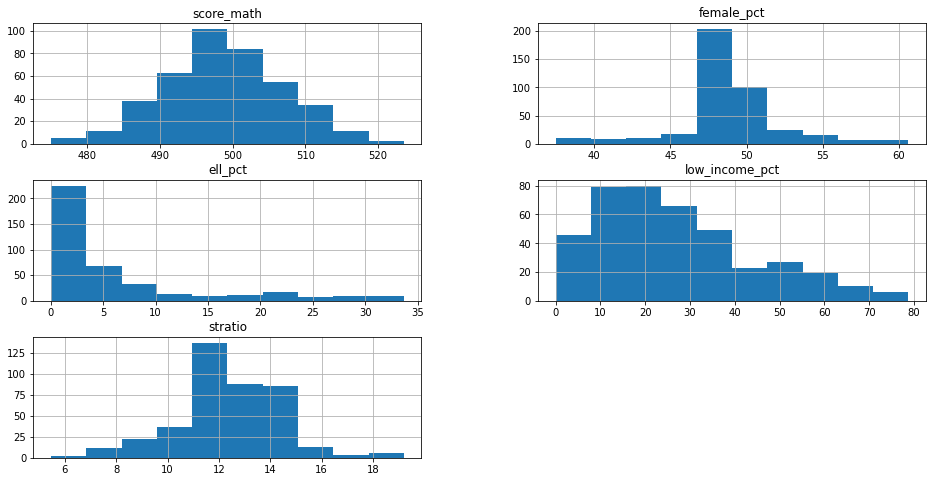

In [41]:
df_doe.hist(figsize=(16,8));

From the histograms, we can already see that both **ell_pct** and **low_income_pct** are positively skewed. **Stratio** may be negatively skewed, whereas the other two variables are relatively normal distributed.

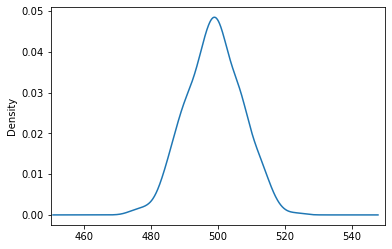

In [42]:
df_doe.score_math.plot(kind='density', xlim=(450, 550));

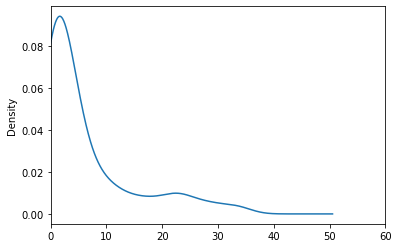

In [43]:
df_doe.ell_pct.plot(kind='density', xlim=(0, 60));

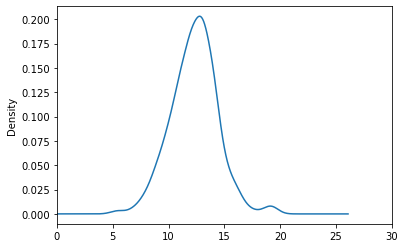

In [44]:
df_doe.stratio.plot(kind='density', xlim=(0, 30));

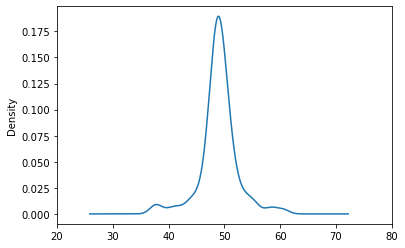

In [45]:
df_doe.female_pct.plot(kind='density', xlim=(20, 80));

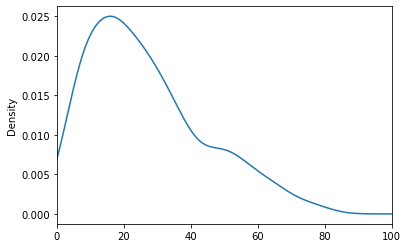

In [46]:
df_doe.low_income_pct.plot(kind='density', xlim=(0, 100));

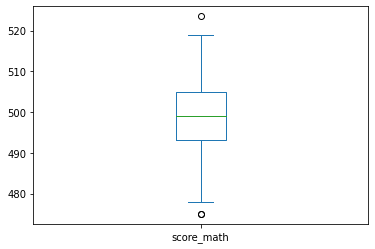

In [47]:
df_doe.score_math.plot(kind="box");

In [48]:
df_doe.corr()

,score_math,female_pct,ell_pct,low_income_pct,stratio
score_math,1.000000,0.050514,-0.282562,-0.693170,0.013213
female_pct,0.050514,1.000000,0.068782,0.035466,0.135823
ell_pct,-0.282562,0.068782,1.000000,0.661230,0.046204
low_income_pct,-0.693170,0.035466,0.661230,1.000000,-0.013753
stratio,0.013213,0.135823,0.046204,-0.013753,1.000000


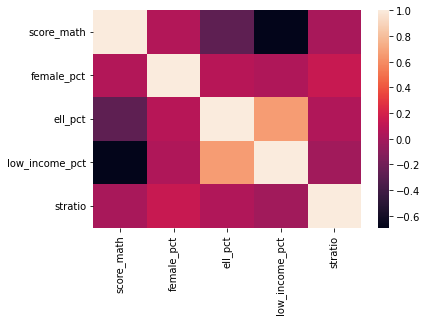

In [49]:
sns.heatmap(df_doe.corr());

We can already identify a very strong negative correlation between **score_math** and **low_income_pct**.

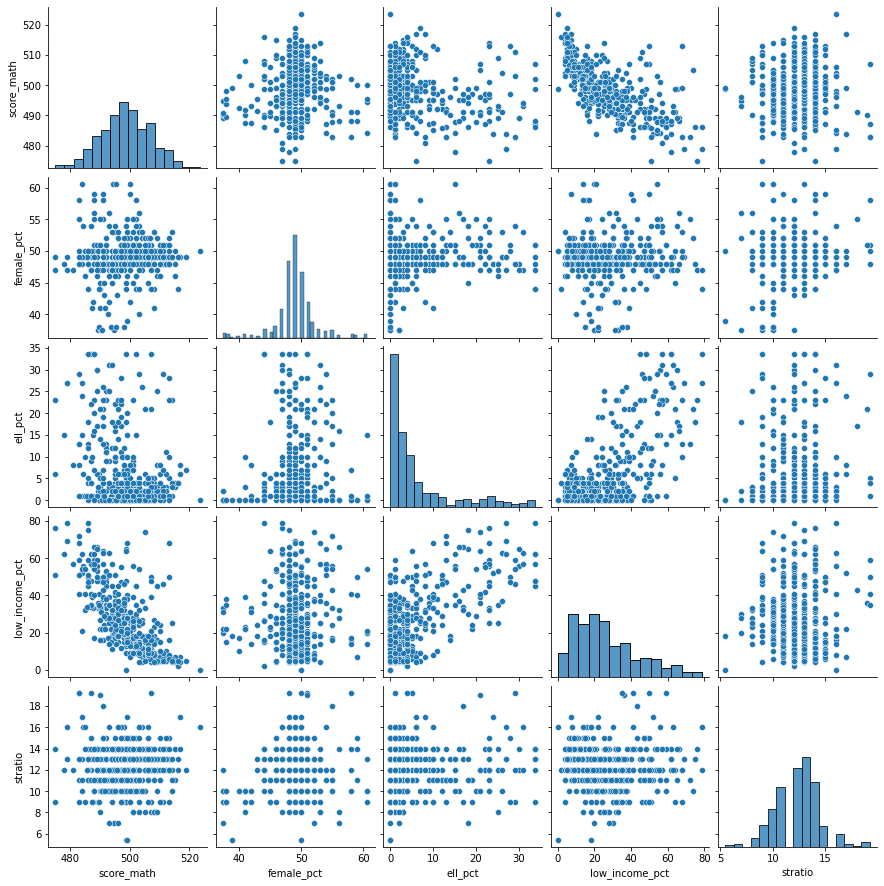

In [50]:
sns.pairplot(df_doe);

## Step 3: Multiple Regression (Statsmodels)

#### Assign dependent/predictor variables:

In [51]:
X = df_doe.drop("score_math", axis=1)
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)

#### Assign independent/outcome variable:

In [52]:
y = df_doe["score_math"].values

#### Run the model:

In [53]:
model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict(X)

#### Scatterplot:

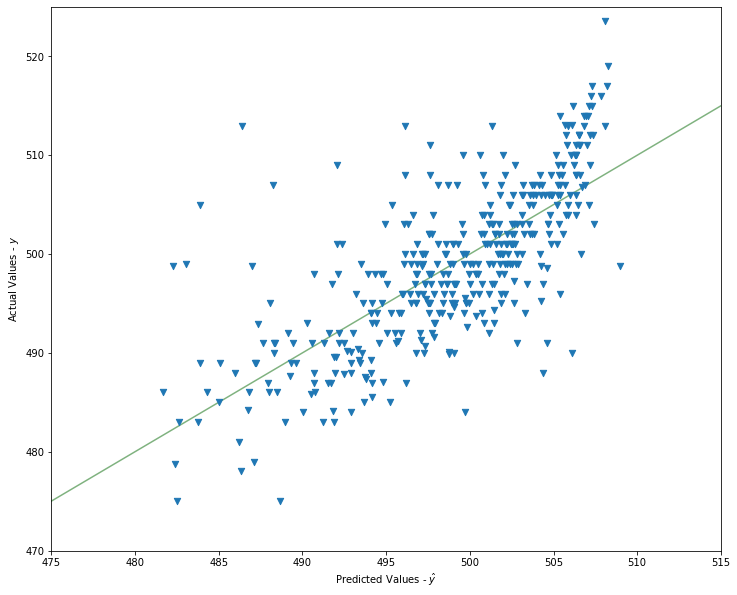

In [54]:
chart_xlim = 40
chart_ylim = 55

plt.figure(figsize=(12,10))
plt.scatter(predictions, y, s=40, marker='v', zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")

axes = plt.gca()
axes.set_xlim([475,515])
axes.set_ylim([470,525])

plt.plot(range(0,600), range(0,600), c=(0,0.4,0,0.5))

plt.show();

In the scatterplot, we see the comparison of the actual values and the predicted values. Most of the datapoints are nicely scattered around the line, which confirms the predictive utility of the model.

#### Model Paramters:

In [55]:
list(zip(df_doe.drop("score_math", axis=1).columns, model.params))

[('female_pct', 0.15279198073435607),
 ('ell_pct', 0.3035699432425836),
 ('low_income_pct', -0.4244038539377776),
 ('stratio', -0.08635822340341104)]

The regression coefficients present the slope of the relationship between the outcome variable and the part of the independent variable that is uncorrelated with the other independent variables.

#### Model Summary:

In [56]:
col_names = list(df_doe.drop("score_math", axis=1).columns) + ['y_intercept']
model.summary(xname=col_names)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     117.2
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           4.61e-66
Time:                        14:03:58   Log-Likelihood:                -1267.9
No. Observations:                 405   AIC:                             2546.
Df Residuals:                     400   BIC:                             2566.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
female_pct         0.1528      0.082      1.870      0.062      -0.008       0.313
ell_pct            0.3036      0.045      6.813      0.000       0.216       0.391
low_income_pct    -0.4244      0.021    -19.873      0.000      -0.466      -0.382
stratio           -0.0864      0.134     -0.646      0.519      -0.349       0.176
y_intercept      501.8038      4.149    120.949      0.000     493.647     509.960
==============================================================================
Omnibus:                       46.979   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.435
Skew:                           0.620   Prob(JB):                     3.46e-23
Kurtosis:                       5.143   Cond. No.                         873.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Semi-Partial Correlations:

In [57]:
df_sempart_female_pct = pg.partial_corr(data=df_doe, x='female_pct', y='score_math', x_covar=['ell_pct', 'low_income_pct', 'stratio'])
df_sempart_female_pct.rename(index={'pearson': 'female_pct'}, inplace=True)
df_sempart_ell_pct = pg.partial_corr(data=df_doe, x='ell_pct', y='score_math', x_covar=['female_pct', 'low_income_pct', 'stratio'])
df_sempart_ell_pct.rename(index={'pearson': 'ell_pct'}, inplace=True)
df_sempart_low_income_pct = pg.partial_corr(data=df_doe, x='low_income_pct', y='score_math', x_covar=['female_pct', 'ell_pct', 'stratio'])
df_sempart_low_income_pct.rename(index={'pearson': 'low_income_pct'}, inplace=True)
df_sempart_stratio = pg.partial_corr(data=df_doe, x='stratio', y='score_math', x_covar=['female_pct', 'low_income_pct', 'low_income_pct'])
df_sempart_stratio.rename(index={'pearson': 'stratio'}, inplace=True)
df_sempart = pd.concat([df_sempart_female_pct, df_sempart_ell_pct, df_sempart_low_income_pct, df_sempart_stratio], axis=0)

In [58]:
df_sempart

,n,r,CI95%,p-val
female_pct,405,0.063456,"[-0.03, 0.16]",2.042230e-01
ell_pct,405,0.231144,"[0.14, 0.32]",2.819274e-06
low_income_pct,405,-0.674205,"[-0.72, -0.62]",1.321579e-54
stratio,405,-0.006633,"[-0.1, 0.09]",8.945292e-01


A semi-partial correlation is the correlation coefficient between the dependent variable and a given independent variable after controlling for the relationship between the DV and other IVs in the model.

## Step 3: Multiple Regression with Standardized Values (Statsmodels)

Here, I standardize the values which allows us to better compare the effect of each independent variable:

In [59]:
df_doe = df_doe.apply(stats.zscore)

#### Assign dependent/predictor variables:

In [60]:
X = df_doe.drop("score_math", axis=1)
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)

#### Assign independent/outcome variable:

In [61]:
y = df_doe["score_math"].values

#### Run the model:

In [62]:
model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict(X)

#### Scatterplot:

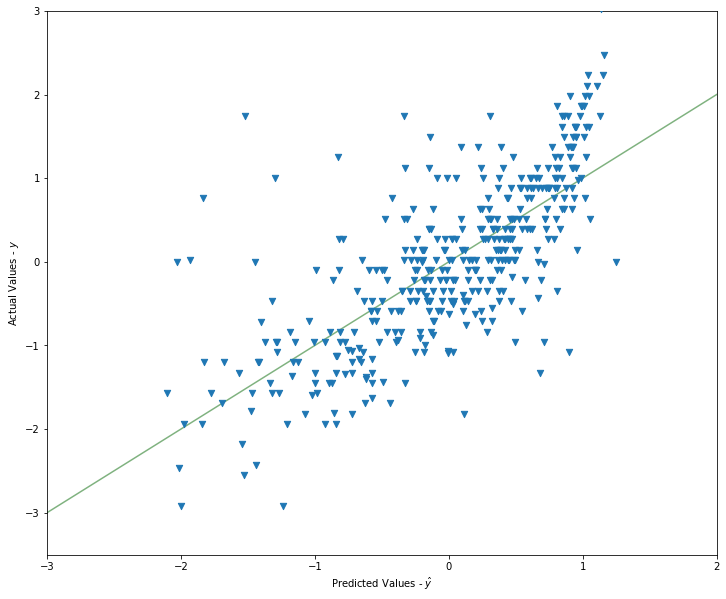

In [63]:
chart_xlim = 5
chart_ylim = 6.5

plt.figure(figsize=(12,10))
plt.scatter(predictions, y, s=40, marker='v', zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")

axes = plt.gca()
axes.set_xlim([-3,2])
axes.set_ylim([-3.5,3])

plt.plot(range(-5,5), range(-5,5), c=(0,0.4,0,0.5))

plt.show();

#### Model Paramters:

In [64]:
list(zip(df_doe.drop("score_math", axis=1).columns, model.params))

[('female_pct', 0.06417889580020536),
 ('ell_pct', 0.3093602432967595),
 ('low_income_pct', -0.900309614292359),
 ('stratio', -0.022180115634874563)]

These are the standardized regression coefficients, which means that the influence of the range of possible scores is removed statistically. We can already see that the coefficient of **low_income_pct** has the greatest magnitude and therefore plays a greater role in explaining **score_math**.

#### Model Summary:

In [65]:
col_names = list(df_doe.drop("score_math", axis=1).columns) + ['y_intercept']
model.summary(xname=col_names)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     117.2
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           4.61e-66
Time:                        14:03:58   Log-Likelihood:                -417.60
No. Observations:                 405   AIC:                             845.2
Df Residuals:                     400   BIC:                             865.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
female_pct         0.0642      0.034      1.870      0.062      -0.003       0.132
ell_pct            0.3094      0.045      6.813      0.000       0.220       0.399
low_income_pct    -0.9003      0.045    -19.873      0.000      -0.989      -0.811
stratio           -0.0222      0.034     -0.646      0.519      -0.090       0.045
y_intercept     3.445e-15      0.034   1.02e-13      1.000      -0.067       0.067
==============================================================================
Omnibus:                       46.979   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.435
Skew:                           0.620   Prob(JB):                     3.46e-23
Kurtosis:                       5.143   Cond. No.                         2.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 4: Interpretation

### Technical Summary:

A multiple regression was conducted to evaluate both the combined and unique contributions of income, English speaking abilites, teacher-to-student ratio, and gender for predicting individual differences in Math abilities. In combination, the predictors made a **significant contribution** to the prediction of the dependent variable, accounting for approximately **54% of the variance** in **Math MCAS scores**; *R^2* = 0.54 (*Adj. R^2* = 0.535), *F*(4, 400) = 117.2, *p* < 0.001. Of the four predictors, only **low_income_pct** (*Beta* = -0.90, *t* = -19.87, *p* < 0.001) and **ell_pct** (*Beta* = 0.31, *t* = 6.81, *p* < 0.001) made **significant unique contributions**, uniquely accounting for **45.45%** and **5.34%** of the variance in Math MCAS scores, respectively.

### Implications & Future Directions:

This analysis has shown that math abilities in school districts with a high percentage of **low-income households** tend to be poorer compared to districts with less low-income households. The very high unique contribution of 45.45% is alarming and, while no causation can be established, future interventions should particularly target those students that come from a low-income household and, for example, offer them extra support in Mathematics or improve teacher quality within those districts. 

While math abilities in districts with a high percentage of **English Language Learners** also tend to be poorer compared to districts with less ELLs, its unique impact is not as great. A potential explanation could be that ELLs are not actually worse in Mathematics that non-ELLs but that they just have struggles understanding the tasks because of language barriers. This should be further investigated to determine whether ELLs should be targeted through interventions.

Both **gender** and **student-to-teacher ratio** do not have any utility in predicting Math abilties. It may be worth investigating the impact of gender on Math abilties from student to student instead of doing it from district to district as it has previously been shown that females are often being encouraged less to undertake mathematical subjects. In future analyses, one may investigate the effect of teacher quality instead of student to teacher ratio as good quality teaching may be more important as having more teachers with regards to Math abilites.

### Improvements of the Regression Model

Test model assumptions and fix them (i.e, linearity, normality, multicolleanarity, homoskedasticity).

Integrate teacher quality and remove gender and student to teacher ratio.

Run a regression with percent of students meeting or exceeding expectations on the Math MCAS test as the outcome variable.

Split data set into train and test data to check applicable predictive utility of the model.

Try a logarithmic model.